In [30]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
import scipy.signal as signal

In [31]:
# Load the audio file
audio_file_path = '/home/hice1/pbegwani3/scratch/maestro/maestro-v3.0.0/2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.wav'
sample_rate, audio_data = wavfile.read(audio_file_path)

In [32]:
frequencies, times, spectrogram = signal.spectrogram(audio_data, fs=sample_rate)

/usr/local/pace-apps/manual/packages/anaconda3/2023.03/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


/scratch/902822/ipykernel_408567/1546355850.py:1: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(spectrogram, aspect='auto', extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])


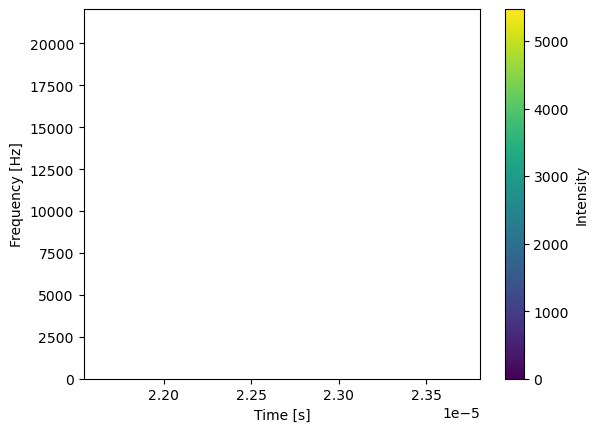

In [33]:
plt.imshow(spectrogram, aspect='auto', extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Intensity')
plt.show()
